# Линейная регрессия

# Задание 1

Считайте файл weights_heights.csv

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('weights_heights.csv') #your code here
df.head()

,Height,Weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [3]:
df.shape

(25000, 2)

Разбейте данные на тренировочную и валидационную часть и обучите линейную регрессию на тренировочной части (используйте функцию linear_regression для обучения)

In [4]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(df['Height'],df['Weight'],test_size=0.2) #train 0.8, test 0.2

In [12]:
type(Xtrain)

pandas.core.series.Series

# Проверим, как работает функция линейной регрессии из sklearn

In [14]:
from sklearn.linear_model import LinearRegression #scikit learn
from sklearn.metrics import mean_squared_error

Xtrain2 = Xtrain.values.reshape(-1,1)
Xtest2 = Xtest.values.reshape(-1,1)

lr = LinearRegression()
lr.fit(Xtrain2,ytrain)

pred_train = lr.predict(Xtrain2)
pred_test = lr.predict(Xtest2)

print(mean_squared_error(pred_train,ytrain), mean_squared_error(pred_test,ytest))

101.4313105397405 102.22587633900721


In [13]:
type(Xtrain2)

numpy.ndarray

Посмотрим на качество линейной регрессии на кросс-валидации.

In [15]:
from sklearn.model_selection import cross_val_score

print(-cross_val_score(lr, df[['Height']], df['Weight'], cv=3, 
                       scoring='neg_mean_squared_error').mean())

101.61260513801402


# Задание 2

Поработаем с датасетом Бостон.

In [16]:
from sklearn.datasets import load_boston

data = load_boston()
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/Users/maksimkarpov/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California

In [17]:
X_full = data.data
y_full = data.target

Посмотрите на качество линейной регрессии (из sklearn) на кросс-валидации.

In [19]:
#your code here
print(-cross_val_score(LinearRegression(), X_full, y_full, cv=5, 
                       scoring='neg_mean_squared_error').mean())

37.131807467699204


Разбейте данные на train и test. Обучите линейную регрессию на train и сделайте предсказание на train и test.

Выведите MSE на train и на test.

In [20]:
#your code here
Xtrain, Xtest, ytrain, ytest = train_test_split(X_full, y_full, test_size=0.25) 

In [21]:
lr = LinearRegression()
lr.fit(Xtrain,ytrain)

LinearRegression()

In [22]:
pred_test = lr.predict(Xtest)

In [24]:
len(pred_test)

127

In [25]:
print(mean_squared_error(pred_test,ytest))

26.0187295086901


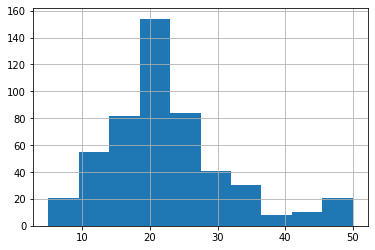

In [37]:
pd.Series(data.target).hist();

In [31]:
print(data.target.min(), data.target.max())

5.0 50.0


Нарисуем матрицу корреляций признаков.

In [39]:
import numpy as np

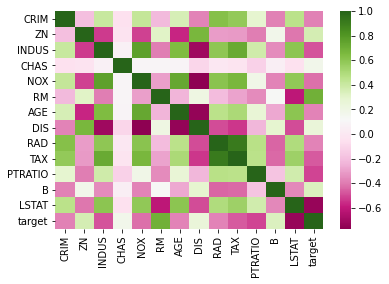

In [41]:
import seaborn as sns

data1 = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= list(data['feature_names']) + ['target'])

corr = data1.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="PiYG");

In [43]:
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [42]:
np.corrcoef(data1['LSTAT'],data1['target'])[0][1]

-0.7376627261740151

In [49]:
del data1['CHAS']

In [50]:
del data1['DIS']

In [51]:
data1

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.538,6.575,65.2,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,1.0,273.0,21.0,393.45,6.48,22.0


In [55]:
data2 = data1.drop('target', axis=1)

In [56]:
data2

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.573,6.120,76.7,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.573,6.976,91.0,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.573,6.794,89.3,1.0,273.0,21.0,393.45,6.48


In [75]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data2, data1['target'], test_size=0.25, random_state=20) 

In [76]:
Xtrain.shape

(379, 11)

In [77]:
Xtest.shape

(127, 11)

Попробуйте убрать из данных признаки с наименьшей корреляцией с target (1, 2 или 3 признака) и обучить линейную регрессию на оставшихся признаках. Как изменилось качество?

In [78]:
#your code here
lr = LinearRegression()
lr.fit(Xtrain, ytrain)
pred_test = lr.predict(Xtest)
mean_squared_error(pred_test, ytest)

26.265428014852816

# Задание 3

Поработайте с датасетом affairs. Предскажите значение в колонке affairs по остальным факторам.

1. Сначала проведите разведочный анализ, а именно, исследуйте зависимость таргета от каждого фактора (или пары факторов).

2. Обучите линейную регрессию, посмотрите на качество на кросс-валидации, затем разбейте данные на train и test,
обучите алгоритм на train и сделайте предсказания на train и test, выведите ошибки.

3. Посмотрите на матрицу корреляций факторов и целевой переменной. 
Если есть пары сильно коррелирующих между собой факторов, удалите один из пары.

Если есть факторы, слабо коррелирующие с таргетом, удалите их.

Заново обучите алгоритм на обновленных данных. Как изменилось его качество?

In [ ]:
#your code here